# Comportamiento del precio de las acciones TESLA.(TSLA) utilizando API PROPHET

Metodología Forecasting acciones Empresa Claro

Se intenta predecir el comportamiento de precios, de la accion Tesla Inc.(TSLA) empresa dedicada a la industria automovilistica, se utilizará la API PROPHET,el cual calcula diferetes modelos, facilitando llegar a mejores estimadores

### Obtección de data
Se extraera la data del sito web yahoo, mediante acceso API

Primero hay que instalar el SDK del sitio web

pip install yahoo-finance-api2 o pip install yfinance

![imagen1.jpg](imagen1.png)

Prophet sigue el sklearnmodelo API, sus características más destacadas son: la estacionalidad múltiple, las tasas de crecimiento cambiantes y la capacidad de modelar días especiales (como los playoffs de Manning y las apariciones en el superbowl

In [42]:
# importar librerias 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sktime
from sktime.utils.plotting import plot_series
# !pip install sktime[all_extras]
# !pip install sktime
#!pip install pycaret
#import librerias de Yahoo Finance
import datetime as dt
import yfinance as yf

In [43]:
# importar data 

#defirnir la etiqueta compañia 
company = 'TSLA'

# Define a start date and End Date
start = dt.datetime(2018,1,1)  
end =  dt.datetime(2023,2,18)

# Cargara data, si no se incluyen los parametros "start y end" se obtiene toda la data disponible

df_telsa = yf.download(company)
df_telsa.shape

[*********************100%***********************]  1 of 1 completed


(3179, 6)

In [44]:
# Guardar la data 
df_telsa.to_csv('data.csv')

In [45]:
# importar librerias 

import pandas as pd
from prophet import Prophet
#!pip install pystan
#!pip install fbprophet o # !python -m pip install prophet

#import librerias de Yahoo Finance
import datetime as dt
import yfinance as yf

In [46]:
# Mostrar los datos
print(df_telsa.shape)
df_telsa.tail(3)

(3179, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-09,207.779999,214.000000,204.770004,207.320007,207.320007,215431400
2023-02-10,202.229996,206.199997,192.889999,196.889999,196.889999,204193800
2023-02-13,194.414993,196.300003,187.610001,194.639999,194.639999,171995969


# Implementación del framework de PROPHET

* Se selecciona la característica o data en estudio, es requerido que sea un Data_Frame, dado que este framework trabaja solo con este tipo de data, a diferencia de otros framework como pycaret, el cual requiere data tipo Serie 

* La entrada a Prophet es siempre un marco de datos con dos columnas: dsy y. La dscolumna (marca de fecha) debe tener el formato esperado por Pandas, idealmente AAAA-MM-DD para una fecha o AAAA-MM-DD HH:MM:SS para una marca de tiempo. La ycolumna debe ser numérica y representa la medida que deseamos pronosticar.


In [47]:
#leer data
df_telsa = pd.read_csv('data.csv')
df_telsa.shape

(3179, 7)

In [48]:
# Seleccionar la vareble de estudio, la cual es el precio de cierre 
df_telsa = pd.DataFrame(df_telsa, columns=["Date", "Close"])
#renombrar las columnas, es requerido por de Framework
df_telsa.columns = ['ds', 'y']
df_telsa.tail()

,ds,y
3174,2023-02-07,196.809998
3175,2023-02-08,201.289993
3176,2023-02-09,207.320007
3177,2023-02-10,196.889999
3178,2023-02-13,194.639999


# Ajuste del modelo

 Se crea el objeto eProphet, el argumento "interval_width" especifica el intervalo de confianza, el argumento "daily_seasonality" activa la estacionalidad diaria, esto se debe activar si a lo largo del día se presentan patrones estacionarios, ejemplo:
* En un restaurante en las horas de la noche y en la tarde pueden existir mas ventas 


In [49]:
m = Prophet(interval_width=0.95, daily_seasonality = False)

In [50]:
# Ajuste de la data
m.fit(df_telsa)

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Luego, las predicciones se realizan en un marco de datos con una columna dsque contiene las fechas para las que se debe realizar una predicción. Puede obtener un marco de datos adecuado que se extienda hacia el futuro un número específico de días utilizando el método de ayuda Prophet.make_future_dataframe. De forma predeterminada, también incluirá las fechas del historial, por lo que también veremos el ajuste del modelo.

In [51]:
# Se hace la estimación a 90 periodos o días, con una freciencia diaria
future = m.make_future_dataframe(periods=90, freq='D')
future.tail()

,ds
3264,2023-05-10
3265,2023-05-11
3266,2023-05-12
3267,2023-05-13
3268,2023-05-14


El predictmétodo asignará a cada fila futureun valor predicho que nombra yhat. Si pasa fechas históricas, proporcionará un ajuste dentro de la muestra. El forecastobjeto aquí es un nuevo marco de datos que incluye una columna yhatcon el pronóstico, así como columnas para componentes e intervalos de incertidumbre.

In [52]:
# Tabla de estumadores del modelo junto con sus interval_value

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
3264,2023-05-10,301.558822,235.079584,361.970827
3265,2023-05-11,300.834997,230.506576,366.435719
3266,2023-05-12,300.020054,236.537158,363.718199
3267,2023-05-13,301.887912,238.543281,366.294760
3268,2023-05-14,301.508505,234.611497,366.472974


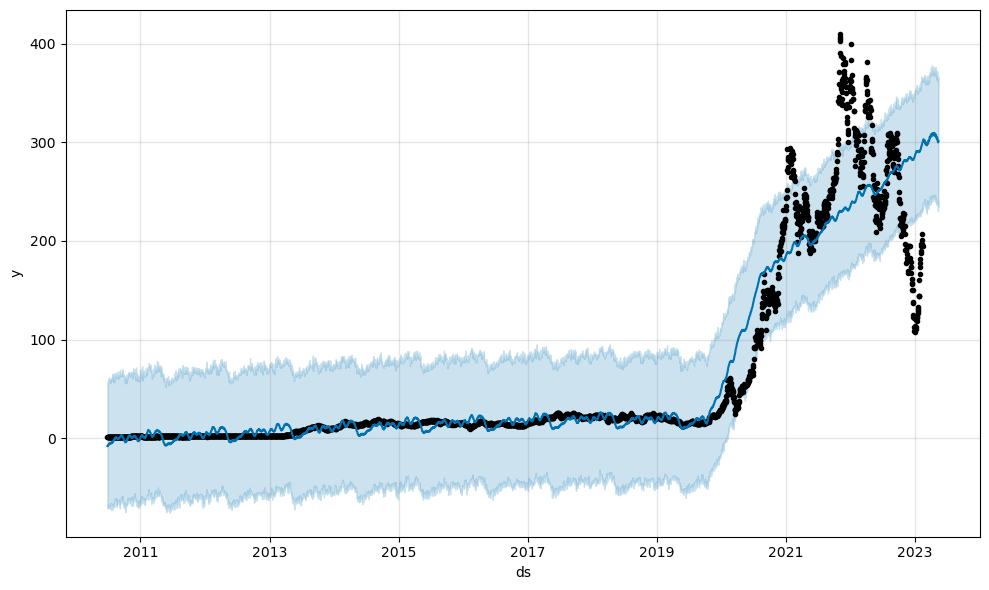

In [53]:
# grafica de pronostico
fig1 = m.plot(forecast)

Las acciones del Tesla tienen a crecer, en el horizonte te forecasting, al finalizar el perdió, su precio pasa de 194.63 a 301.50 dolares 

## componentes del pronóstico

Se verá la tendencia, la estacionalidad anual y la estacionalidad semanal de la serie temporal. Si incluye días festivos, también los verá aquí.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



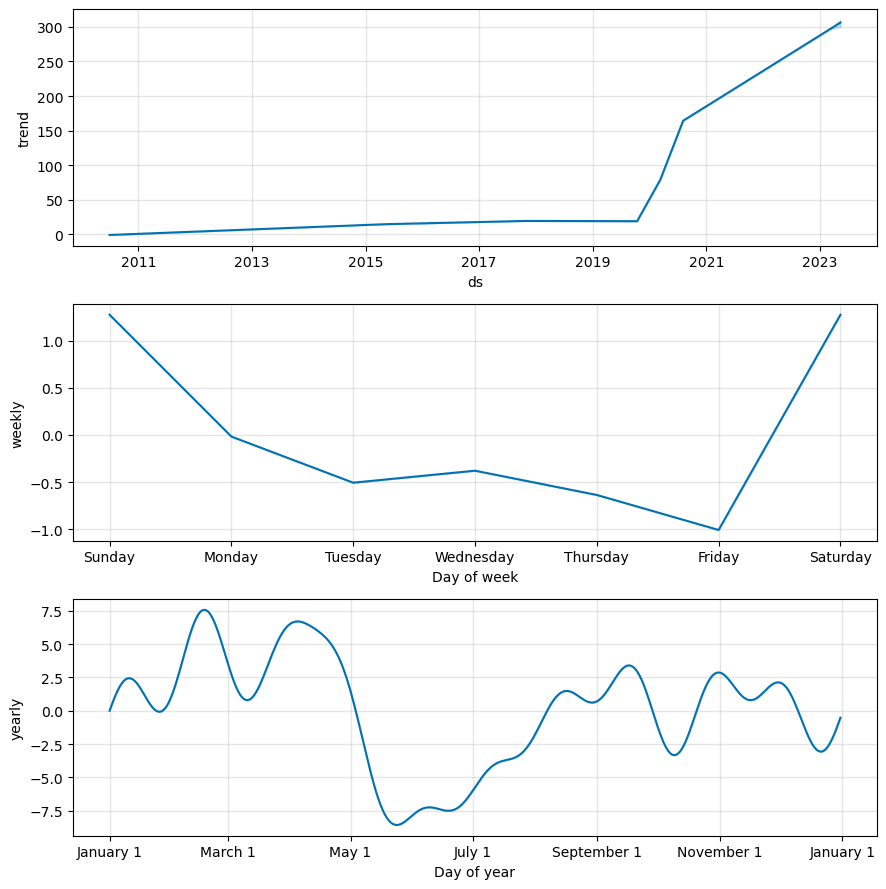

In [54]:
fig2 = m.plot_components(forecast)

Aparentemente existe estacionariedad anual, sin embargo es variante a coto y mediano plazo 

In [55]:
# Gafica interractiva del pronostico 
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [56]:
# Grafica tendencia y la estacionalidad animada
plot_components_plotly(m, forecast)

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\plotly\io\_json.py:471: UserWarning:

Discarding nonzero nanoseconds in conversion.

